In [1]:
import sys
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install pycryptodome
#!{sys.executable} -m pip install pycryptodomex
#!{sys.executable} -m pip install gnupg
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


Average error during the calibration:  3.43 mm


<IPython.core.display.Javascript object>


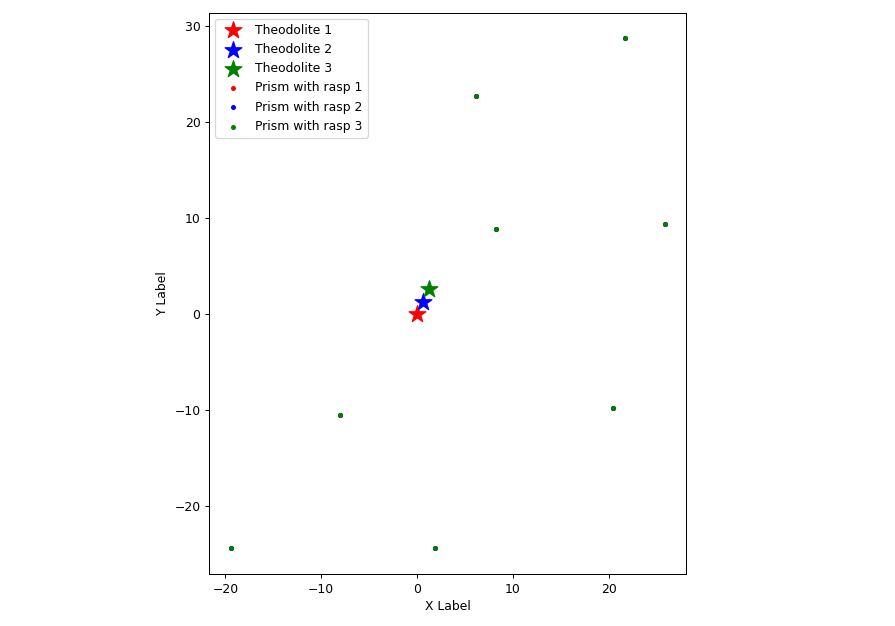

In [2]:
%matplotlib notebook
# Read markers file of grand axe and show them
tfu = importlib.reload(tfu)
file_name = './data/total_station/20220224/20220224_theodolite_reference_prisms.txt'

trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand = tfu.read_marker_file(file_name, 1)

error = []
for i,j,k in zip(trimble_1,trimble_2,trimble_3):
    dist_12 = np.linalg.norm(i-j)
    dist_13 = np.linalg.norm(i-k)
    dist_23 = np.linalg.norm(k-j)
    error.append(dist_12)
    error.append(dist_13)
    error.append(dist_23)
print("Average error during the calibration: ", round(np.mean(error)*1000,3), "mm")

tfu.plot_trajectories_prism(3, trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand, 0, 0,"example.pdf",1)

Number of data for theodolites: [5277 4976 5037]
Bad measures: 558


<IPython.core.display.Javascript object>


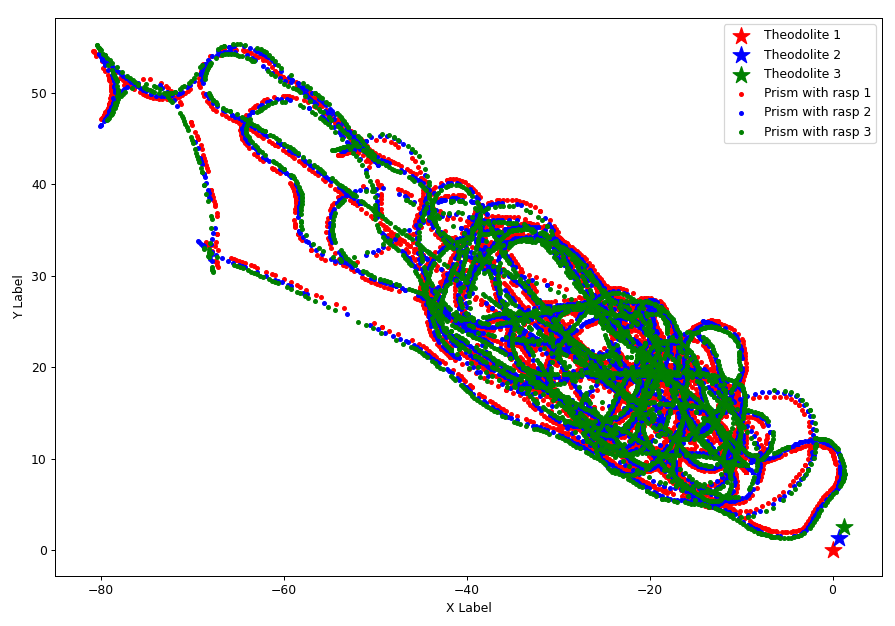

In [4]:
# Read rosbag of grand axe and show the trajectory
tfu = importlib.reload(tfu)

# 24 02 22
file = "/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag"

Tf = []
Tf.append(T_1_grand)
Tf.append(T_2_grand)
Tf.append(T_3_grand)
trajectory_trimble_1, trajectory_trimble_2, trajectory_trimble_3, time_trimble_1, time_trimble_2, time_trimble_3 = tfu.read_rosbag_theodolite_with_tf(file, Tf)
trimble_1 = np.array(trajectory_trimble_1).T
trimble_2 = np.array(trajectory_trimble_2).T
trimble_3 = np.array(trajectory_trimble_3).T

%matplotlib notebook
# Variable to plot in 3d, 0 = 2D, 1 = 3D
plot_3d = 0
# Variable to save file in pdf
save_pdf = 0
# file name to save plot in pdf
file_pdf = "./figs/24-02-2022.pdf"
#file_pdf = "./figs/11-20-52.jpg"

tfu.plot_trajectories_prism(3, trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand, plot_3d, save_pdf, file_pdf, 1)

In [9]:
# Read rosbag of grand axe and show the trajectory
ttfu = importlib.reload(ttfu)

# 24 02 22
file = "/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag"

Tf = []
Tf.append(T_1_grand)
Tf.append(T_2_grand)
Tf.append(T_3_grand)
trajectory_trimble_1, trajectory_trimble_2, trajectory_trimble_3, time_trimble_1, time_trimble_2, time_trimble_3, distance_1, distance_2, distance_3 = ttfu.read_rosbag_theodolite_with_tf_more(file, Tf)
trimble_1 = np.array(trajectory_trimble_1).T
trimble_2 = np.array(trajectory_trimble_2).T
trimble_3 = np.array(trajectory_trimble_3).T
offset_timestamp = min(time_trimble_1[0],time_trimble_2[0],time_trimble_1[2])

Number of data for theodolites: [5277 4976 5037]
Bad measures: 558


<IPython.core.display.Javascript object>


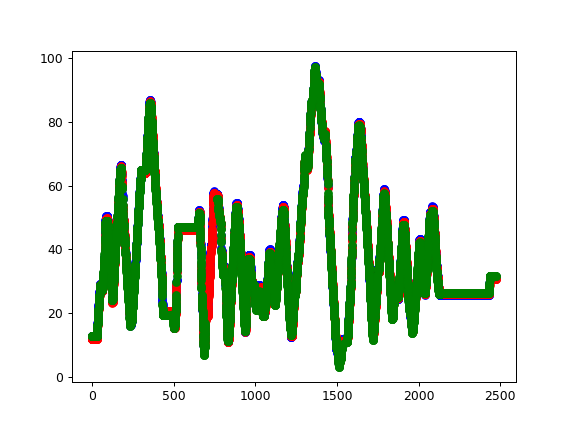

In [10]:
%matplotlib notebook
plt.figure(0)
plt.scatter([(i-offset_timestamp) for i in time_trimble_1], distance_1, color='b')
plt.scatter([(i-offset_timestamp) for i in time_trimble_2], distance_2, color='r')
plt.scatter([(i-offset_timestamp) for i in time_trimble_3], distance_3, color='g')

In [18]:
min_time = np.min([np.min(time_trimble_1), np.min(time_trimble_2), np.min(time_trimble_3)])
max_time = np.max([np.max(time_trimble_1), np.max(time_trimble_2), np.max(time_trimble_3)])
print(min_time, max_time)

window = 10
rate_1 = []

print(1/time_trimble_1[0:10])
for i in range(0,len(time_trimble_1)-window):
    period = 0
    for j in time_trimble_1[i:i+window]:
        period = period + time_trimble_1[j+1] - time_trimble_1[j]
        rate_1.append()

1645734877.7591834 1645737348.968749


TypeError: unsupported operand type(s) for /: 'int' and 'list'

<IPython.core.display.Javascript object>


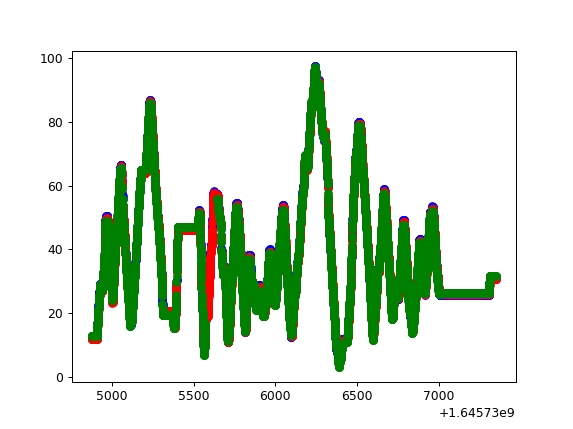

In [13]:
%matplotlib notebook
plt.figure(0)
plt.scatter(time_trimble_1, distance_1, color='b')
plt.scatter(time_trimble_2, distance_2, color='r')
plt.scatter(time_trimble_3, distance_3, color='g')